# CS145 Howework 4


<span style="color:red"> **Important Note:** </span>
HW4 is due on **11:59 PM PT, Nov 20 (Friday, Week 7)**. Please submit through GradeScope. 

## Print Out Your Name and UID

<span style="color:blue"> **Name: Yunong Ye, UID: 004757414** </span>

## Before You Start

You need to first create HW4 conda environment by the given `cs145hw4.yml` file, which provides the name and necessary packages for this tasks. If you have `conda` properly installed, you may create, activate or deactivate by the following commands:

```
conda env create -f cs145hw4.yml
conda activate hw4
conda deactivate
```
OR 

```
conda env create --name NAMEOFYOURCHOICE -f cs145hw4.yml 
conda activate NAMEOFYOURCHOICE
conda deactivate
```
To view the list of your environments, use the following command:
```
conda env list
```

More useful information about managing environments can be found [here](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html).

You may also quickly review the usage of basic Python and Numpy package, if needed in coding for matrix operations.

In this notebook, you must not delete any code cells in this notebook. If you change any code outside the blocks (such as some important hyperparameters) that you are allowed to edit (between STRART/END YOUR CODE HERE), you need to highlight these changes. You may add some additional cells to help explain your results and observations.

In [25]:
import numpy as np 
import pandas as pd
import sys 
import random
import math
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


If you can successfully run the code above, there will be no problem for environment setting.

## 1. Clustering Evaluation
This workbook will walk you through an example for calculating different clustering metrics. 

<span style="color:red"> Note: This is a "question-answer" style problem. You do not need to code anything and you are required to calculate by hand (with a scientific calculator). </span>

**Questions**


Suppose we want to cluster the following 20 conferences into four areas, with ground truth label and algorithm output label shown in third and fourth column. Please evaluate the quality of the clustering algorithm according to four different metrics respectively.<img src="conferences.png"  width="600"/>


**Questions (please include intermediate steps)**



1. Calculate purity.
2. Calculate precision.
3. Calculate recall.
4. Calculate F1-score.
5. Calculate normalized mutual information.

In [21]:
ground_truth = [3,3,1,1,1,4,3,3,4,2,4,2,1,2,3,2,1,2,4,4]
output = [2,2,3,3,3,4,2,2,3,1,4,1,3,1,2,1,2,1,4,4]

def info(truth, ouptut):
    result = {'count':0, 'tp':0, 'fp':0, 'tn':0, 'fn':0}
    for i in range(len(truth)):
        for j in range(len(output)):
            # avoid repetitve pair
            if i < j:
                if truth[i] == truth[j]:
                    if output[i] == output[j]:
                        result['tp'] += 1
                    else:
                        result['fn'] += 1
                else:
                    if output[i] == output[j]:
                        result['fp'] += 1
                    else:
                        result['tn'] += 1
                result['count']+= 1
    return result


def table(truth, output):
    result = dict()
    truth_table = dict()
    output_table = dict()
    for i in range(len(truth)):
        if truth[i] not in truth_table:
            truth_table[truth[i]] = list()
        truth_table[truth[i]].append(i)
    for j in range(len(output)):
        if output[j] not in output_table:
            output_table[output[j]] = list()
        output_table[output[j]].append(j)
    result['truth'] = truth_table
    result['output'] = output_table
    return result


def nmi(table, total):
    # I
    i = 0.
    for truth_label in table['truth'].keys():
        for output_label in table['output'].keys():
            truth_values = table['truth'][truth_label]
            output_values = table['output'][output_label]
            common = float(len(list(set(truth_values).intersection(output_values))))
            cur = common / total * np.log(total*common/len(truth_values)/len(output_values)) if common != 0 else 0
            i += cur
            
    # calculate entropy
    h_truth = 0.
    for truth_label in table['truth'].keys():
        truth_length = float(len(table['truth'][truth_label]))
        h_truth -= (truth_length/total*np.log(truth_length/total))
    h_output = 0.
    for output_label in table['output'].keys():
        output_length = float(len(table['output'][output_label]))
        h_output -= (output_length/total*np.log(output_length/total))
    
    nmi = i/np.sqrt(h_truth*h_output)
    return nmi


table = table(ground_truth, output)
info = info(ground_truth,output)
print(info)
print(table)
print(nmi(table, len(output)))

{'count': 190, 'tp': 32, 'fp': 9, 'tn': 141, 'fn': 8}
{'truth': {3: [0, 1, 6, 7, 14], 1: [2, 3, 4, 12, 16], 4: [5, 8, 10, 18, 19], 2: [9, 11, 13, 15, 17]}, 'output': {2: [0, 1, 6, 7, 14, 16], 3: [2, 3, 4, 8, 12], 4: [5, 10, 18, 19], 1: [9, 11, 13, 15, 17]}}
0.8152212305376372


***Purity***

output cluster 1: 10,12,14,16,18 ---> 5 matched with ground truth 2 

output cluster 2: 1,2,7,8,15,17 ---> 5 matched with ground truth 3

output cluster 3: 3,4,5,9,13 ---> 4 matched with ground truth 1

output cluster 4: 6,11,19,20 ---> 4 mathced with ground truth 4

Purity = $\frac{1}{N}\sum_k max|c_k \cap \omega_j|$ = 18/20 = 0.9

***Precision***

Precision = TP/(TP+FP) = 32/(32+9) = 32/41 = 0.78049

***Recall***

Recall = TP/(TP+FN) = 32/(32+8) = 32/40 = 0.8

***F1-score***

F1-score = 2*precision*recall / (precision+recall) = 0.79012

***NMI***
We used script above to calculate NMI = 0.81522

**Your answer here:**


<span style="color:red"> Note: you can use several code cells to help you compute the results and answer the questions. Again you don't need to do any coding. </span>

<span style="color:blue"> Please type your answer here! </span>

answer 1: Purity is 0.9

answer 2: Precision is 0.7809

answer 3: Recall is 0.8

answer 4: F1-score is 0.79012

answer 5: NMI is 0.81522

## 2. K-means

In this section, we are going to apply K-means algorithm against two datasets (dataset1.txt, dataset2.txt) with different distributions, respectively. 


For each dataset, it contains 3 columns, with the format: x1 \t x2 \t cluster_label. You need to use the first two columns for clustering, and the last column for evaluation.


In [32]:
from hw4code.KMeans import KMeans
k = KMeans()
# As a sanity check, we print out a sample of each dataset
dataname1 = "data/dataset1.txt"
dataname2 = "data/dataset2.txt"
k.check_dataloader(dataname1)
k.check_dataloader(dataname2)


For dataset1: number of datapoints is 150
          x         y  ground_truth_cluster
0 -0.163880 -0.219869                     1
1 -0.886274 -0.356186                     1
2 -0.978910 -0.893314                     1
3 -0.658867 -0.371122                     1
4 -0.072518  0.399157                     1

For dataset2: number of datapoints is 200
          x         y  ground_truth_cluster
0  1.068587  0.136921                     1
1  0.705440  0.393068                     1
2  0.840811 -0.054906                     1
3 -0.923447  0.598501                     1
4  0.784353  0.724743                     1


### 2.1 Coding K-means

Complete the `reassignClusters` and `getCentroid` function in `KMeans.py`. 

Print out each output cluster's size and centroid（x,y) for dataset1 and dataset2 respectively.

In [33]:
k = KMeans()
#========================#
# STRART YOUR CODE HERE  #
#========================#
k.main(dataname1)
k.main(dataname2)
#========================#
#   END YOUR CODE HERE   #
#========================# 


For dataset1
Iteration :4
Cluster 0 size :50
Centroid [x=2.5737264423871213, y=-0.027462568841232982]
Cluster 1 size :50
Centroid [x=-0.4633368646347211, y=-0.466114096981958]
Cluster 2 size :50
Centroid [x=0.9888766205736857, y=2.0104789651972013]

For dataset2
Iteration :3
Cluster 0 size :102
Centroid [x=1.2708406269481842, y=-0.08583389704900131]
Cluster 1 size :98
Centroid [x=-0.2018593506236787, y=0.5726963240559536]


### 2.2 Purity and NMI Evaluation

Complete the `compute_purity` function in `KMeans.py`. 

In order to compute NMI, you need to firstly compute NMI matrix and then do the calculation. That is to complete the `getNMIMatrix` and `calcNMI` functions in `KMeans.py`.

Print out the purity and NMI for each dataset respectively.

In [34]:
k = KMeans()
#========================#
# STRART YOUR CODE HERE  #
#========================#
k.main(dataname1, True)
k.main(dataname2, True)
#========================#
#   END YOUR CODE HERE   #
#========================# 


For dataset1
Iteration :4
Purity is 0.040000
NMI is 1.000000
Cluster 0 size :50
Centroid [x=2.5737264423871213, y=-0.027462568841232982]
Cluster 1 size :50
Centroid [x=-0.4633368646347211, y=-0.466114096981958]
Cluster 2 size :50
Centroid [x=0.9888766205736857, y=2.0104789651972013]

For dataset2
Iteration :3
Purity is 0.015000
NMI is 0.205096
Cluster 0 size :102
Centroid [x=1.2708406269481842, y=-0.08583389704900131]
Cluster 1 size :98
Centroid [x=-0.2018593506236787, y=0.5726963240559536]


### 2.3 Visualization

The clustering results for KMeans are saved as `KMeans_dataset1.csv` and `KMeans_dataset2.csv` respectively under your root folder. Plot the clustering results for the two datasets, with different colors representing different clusters.

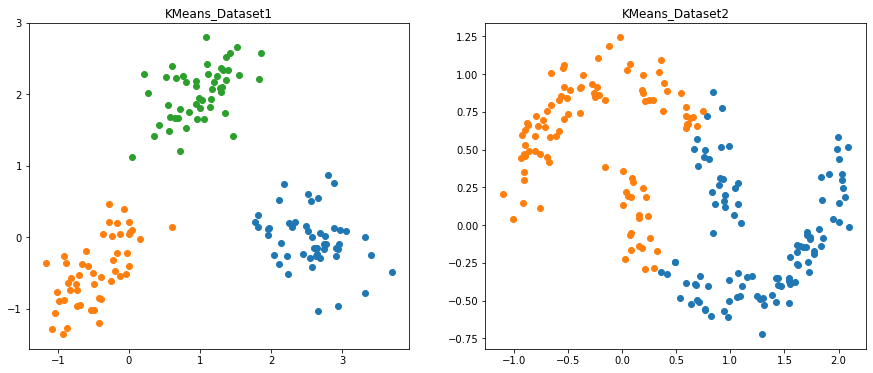

In [36]:
CSV_FILE_PATH1 = 'Kmeans_dataset1.csv'
CSV_FILE_PATH2 = 'Kmeans_dataset2.csv'

df1 = pd.read_csv(CSV_FILE_PATH1,header=None,names=['x','y','pred'])
df2 = pd.read_csv(CSV_FILE_PATH2,header=None,names=['x','y','pred'])
fig, [ax0,ax1] = plt.subplots(1, 2, figsize=(15, 6))
ax0.title.set_text("KMeans_Dataset1")
ax1.title.set_text("KMeans_Dataset2")

#========================#
# STRART YOUR CODE HERE  #
#========================#
groups1 = df1.groupby('pred')
for name, group in groups1:
    ax0.plot(group["x"], group["y"], marker="o", linestyle="", label=name)

groups2 = df2.groupby('pred')
for name, group in groups2:
    ax1.plot(group["x"], group["y"], marker="o", linestyle="",label=name)
#========================#
#   END YOUR CODE HERE   #
#========================# 
plt.show()
    

**Question** 


Give the pros and cons of K-means algorithm. (At least one for pro and two for cons to get full marks)


**Your answer here**


<span style="color:blue"> Please type your answer here! </span>

Pros: 
1. Efficient: time complexity for K-means is O(tkn) which is close to O(n) as t,k <<< n usually.
2. Simple: it is easy to implement the algorithm.

Cons:
1. Sensitive to noise and outlier data.
2. Not suitable for cluster with non-convex shapes
3. Needs to specify the number of k before training

## 3 DBSCAN

In this section, we are going to use DBSCAN for clustering the same two datasets. 



### 3.1 Coding DBSCAN

Complete the `dbscan` function in `DBSCAN.py`. Print out the purity, NMI and cluter size for each dataset respectively.

In [37]:
from hw4code.DBSCAN import DBSCAN
d = DBSCAN()
#========================#
# STRART YOUR CODE HERE  #
#========================#
d.main(dataname1)
d.main(dataname2)
#========================#
#   END YOUR CODE HERE   #
#========================# 


For dataset1
Esp :0.3560832705047313
Number of clusters formed :4
Noise points :11
Purity is 0.060000
NMI is 0.959065
Cluster 0 size :49
Cluster 1 size :41
Cluster 2 size :47
Cluster 3 size :4

For dataset2
Esp :0.18652096476712493
Number of clusters formed :3
Noise points :3
Purity is 0.020000
NMI is 0.817349
Cluster 0 size :99
Cluster 1 size :51
Cluster 2 size :47


### 3.2 Visualization

The clustering results for DBSCAN are saved as `DBSCAN_dataset1.csv` and `DBSCAN_dataset2.csv` respectively under your root folder. Plot the clustering results for the two datasets, with different colors representing different clusters.

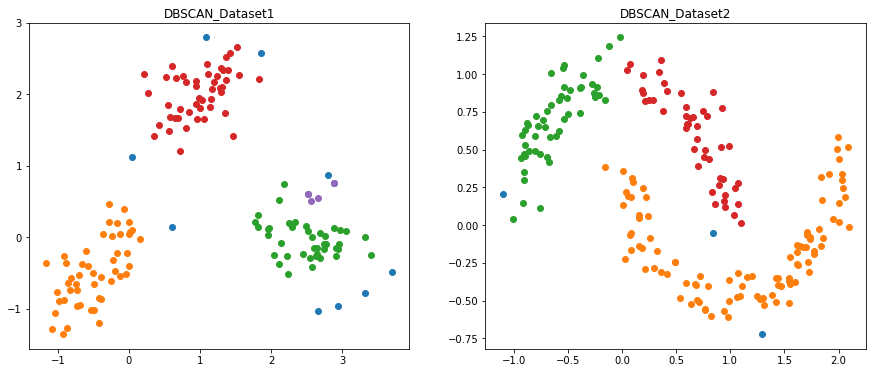

In [38]:
CSV_FILE_PATH1 = 'DBSCAN_dataset1.csv'
CSV_FILE_PATH2 = 'DBSCAN_dataset2.csv'

df1 = pd.read_csv(CSV_FILE_PATH1,header=None,names=['x','y','pred'])
df2 = pd.read_csv(CSV_FILE_PATH2,header=None,names=['x','y','pred'])
fig, [ax0,ax1] = plt.subplots(1, 2, figsize=(15, 6))
ax0.title.set_text("DBSCAN_Dataset1")
ax1.title.set_text("DBSCAN_Dataset2")

#========================#
# STRART YOUR CODE HERE  #
#========================#
groups1 = df1.groupby('pred')
for name, group in groups1:
    ax0.plot(group["x"], group["y"], marker="o", linestyle="", label=name)

groups2 = df2.groupby('pred')
for name, group in groups2:
    ax1.plot(group["x"], group["y"], marker="o", linestyle="",label=name)
#========================#
#   END YOUR CODE HERE   #
#========================# 
plt.show()
    
    
    

**Question** 


Give the pros and cons of DBSCAN algorithm. (At least two for pro and one for cons to get full marks)


**Your answer here**


<span style="color:blue"> Please type your answer here! </span>

Pros:
1. Does not need to specify number of k before.
2. Robust to outlier and noise.

Cons:
1. Has requirement of high density of dataset, also has problem with dataset with varying densities.

## 4 GMM

In this section, we are going to use GMM for clustering the same two datasets. 



### 4.1 Coding GMM

Complete the `Estep` and 'Mstep' function in `GMM.py`. Print out the purity, NMI, final mean, covariance and cluter size for each dataset respectively.

In [40]:
from hw4code.GMM import GMM
g = GMM()
#========================#
# STRART YOUR CODE HERE  #
#========================#
g.main(dataname1)
g.main(dataname2)
#========================#
#   END YOUR CODE HERE   #
#========================# 


For dataset1
Number of Iterations = 22

After Calculations
Final mean = 
-0.46247285694404044 
-0.4638749980764899 

0.9898929396029765 
2.011802723814242 

2.57342634413319 
-0.027108746076609493 


Final covariance = 
For Cluster : 1
0.14918910487220216 
0.1173463005433889 

0.1173463005433889 
0.215548612531075 


For Cluster : 2
0.16028233507625483 
0.07486967581052756 

0.07486967581052756 
0.13939774162738802 


For Cluster : 3
0.18039223672749394 
-0.04672614559811056 

-0.04672614559811056 
0.15206459963738586 


Purity is 0.040000
NMI is 1.000000
Cluster 0 size :50
Cluster 1 size :50
Cluster 2 size :50

For dataset2
Number of Iterations = 95

After Calculations
Final mean = 
0.7464905663922623 
0.4564966584854106 

0.2828785188939104 
-0.05970560727188728 


Final covariance = 
For Cluster : 1
0.7692790765358334 
-0.2878280964238211 

-0.2878280964238211 
0.1901249384356507 


For Cluster : 2
0.68285747576287 
-0.3005891599439051 

-0.3005891599439051 
0.17583559485120057 




### 4.2 Visualization

The clustering results for GMM are saved as `GMM_dataset1.csv` and `GMM_dataset2.csv` respectively under your root folder. Plot the clustering results for the two datasets, with different colors representing different clusters.

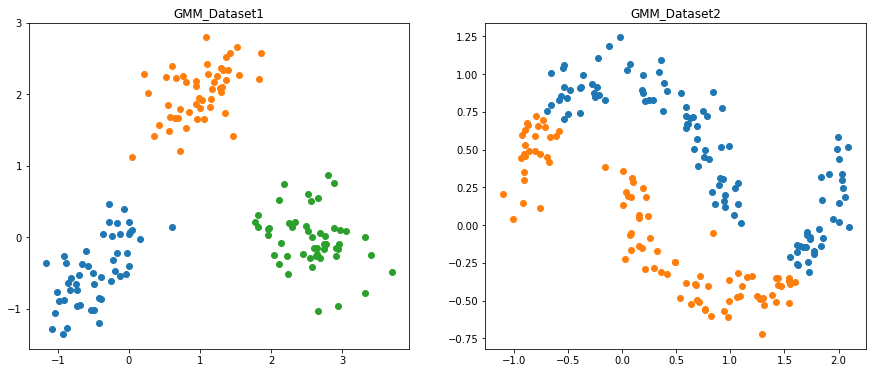

In [41]:
CSV_FILE_PATH1 = 'GMM_dataset1.csv'
CSV_FILE_PATH2 = 'GMM_dataset2.csv'

df1 = pd.read_csv(CSV_FILE_PATH1,header=None,names=['x','y','pred'])
df2 = pd.read_csv(CSV_FILE_PATH2,header=None,names=['x','y','pred'])
fig, [ax0,ax1] = plt.subplots(1, 2, figsize=(15, 6))
ax0.title.set_text("GMM_Dataset1")
ax1.title.set_text("GMM_Dataset2")

#========================#
# STRART YOUR CODE HERE  #
#========================#
groups1 = df1.groupby('pred')
for name, group in groups1:
    ax0.plot(group["x"], group["y"], marker="o", linestyle="", label=name)

groups2 = df2.groupby('pred')
for name, group in groups2:
    ax1.plot(group["x"], group["y"], marker="o", linestyle="",label=name)
#========================#
#   END YOUR CODE HERE   #
#========================# 
plt.show()
    
    
    


**Questions**



1. Give the pros and cons of GMM algorithm. (At least two for pro and two for cons to get full marks)
2. Compare the visualization results from three algorithms, analyze for each dataset why these algorithms would produce such result.

**Your answer here:**


<span style="color:blue"> Please type your answer here! </span>

Pros of GMM:
1. Models are more general, so it can deal with different densities and sizes of cluster.
2. Clusters can be characterized by a small number of parameters.
3. The result may satisfy the statistical asssumptions of the generative models.

Cons of GMM:
1. It will converge to local optimal isntead of global.
2. Can only deal with spherical clusters.
3. Hard to estimate the number of clusters.

Reasoning over dataset1:
1. K-means: each of the three clusters are relatively far from each other while close inside the cluster, so the local optimum k-means reach is the global one this case.
2. DBSCAN: same reason that the three clusters are relatively far from each other. DBSCAN marks some outlier of each cluster and some points that are relatively between the cluster as noise as they are not density-reachable for given eps and minpts.
3. GMM: same reason that the clusters are far from each other making the final result the only possible local optimal for GMM. 

Reasoning over dataset2:
1. K-means: the points are relatively uniformly distributed which makes k-means tend to create 2 cluster by just breaking the points in half by a linear separater.
2. DBSCAN: There is break in the upper half of the points which make DBSCAN cluster the upper swirl into two clusters while the bottom one is more densily-connected so clustered together. And there is certian space between the upper and bottom swirl so DBSCAN captures that and makes some points in between as noise.
3. GMM: similar reason to K-means. K-means reach the local optimal by simply breaking the points in two halves by a relaitively linear separator.

## 5 Bonus Question

Prove that KMeans algorithm would guarantee covergence. (**Hint: prove for each step the loss would descrease.**)

$J = \sum_{j=1}^k\sum_iw_{ij}||x_i-c_j||^2$ as $w_{ij}=1$ if $x_i$ belongs to cluster j is the loss function.

Let $J_i$ be the loss in i-th iteration, $c_{ix}$ be the center assigned to x in i-th iteration.

Then $J_{i+1}-J_i$ =  $\sum||x-c_{(i+1)x}||^2 - ||x-c_{ix}||^2$ 

As $c_{(i+1)x}$ is created by $argmin_c(argmin_w(c_{ix}))$, then  $\sum||x-c_{(i+1)x}||^2 - ||x-c_{ix}||^2 \leq 0$ and only =0 when $c_{(i+1)x} = c_{ix}$ for all x which is the stopping condition. 

Because J always  $\geq 0$. Then the algortihm can converge as loss function is monotonically decreasing until it reaches the stopping/optimal/minimal conidtion.

# End of Homework 4 :)
After you've finished the homework, please print out the entire `ipynb` notebook and four `py` files into one PDF file. Make sure you include the output of code cells and answers for questions. Prepare submit it to GradeScope. Also this time remember assign the pages to the questions on GradeScope